# Project 3 

## Josh McCoy and Jim Haines

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

In [78]:
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Part 1: Regression Analysis of Gapminder Data

### Exercise 1

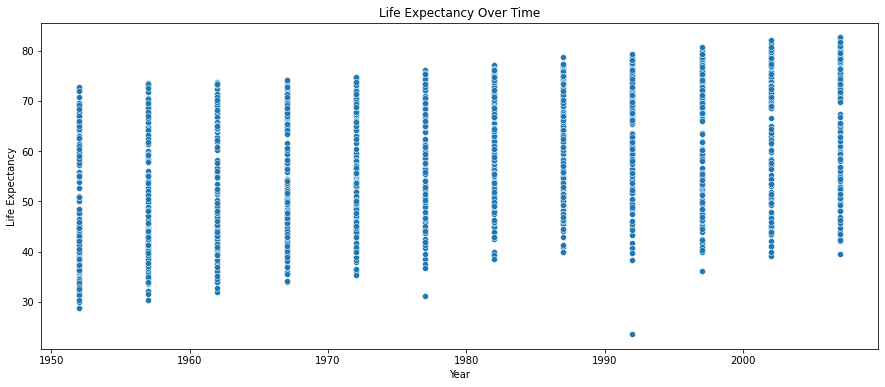

In [79]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='lifeExp', data=data)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.show()

### Question 1: 
*Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)*

Yes, there does seem to be a general trend of increasing life expectancy over time, and it does appear to be linear.

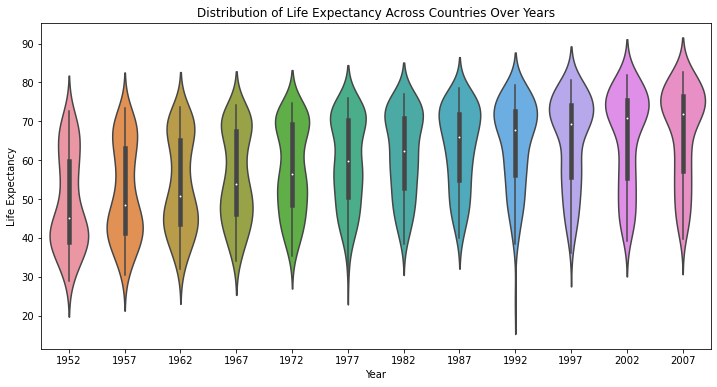

In [80]:
# Get life expectancy values for each year
life_exp_per_year = [data[data['year'] == year]['lifeExp'] for year in sorted(data['year'].unique())]

# New df for violin plot
violin_data = pd.DataFrame(life_exp_per_year).transpose()
violin_data.columns = sorted(data['year'].unique())

# Formatting
plt.figure(figsize=(12, 6))
sns.violinplot(data=violin_data)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Distribution of Life Expectancy Across Countries Over Years')
plt.show()

### Question 2: 
*How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around it’s center?*

The violin plot indicates that the distribution of life expectancy across countries for individual years is generally unimodal as each "violin" has one main peak. There are a few years with multiple peaks, but this can only be seen distinctly in 3 or 4 instances. However, the distributions are not perfectly symmetric as some years show a slight skewness to the right or left. For example, earlier years appear to have a longer tail on the lower end, suggesting a skew towards lower life expectancy. As time progresses, the distributions become taller and narrower with more skew at the higher end of the life expectancy axis. This indicates an overall improvement in life expectancy and a reduction in variance between countries with lower life expectancy.

### Question 3: 

*Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship?*

Based on the trend shown in the violin plot, there seems to be a clear increase in life expectancy over time. The plot shows that the median life expectancy - indicated by the white dot within the thick black bar in the center of each violin - increases as we move from left to right. This upward trend suggests that if we were to fit a linear regression model of life expectancy against the year, we would likely find a significant positive relationship. This means we would reject the null hypothesis of no relationship between year and life expectancy.

### Question 4: 
*What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)*

Intuitively, if the linear regression model from Question 3 were well-fitted, a violin plot of the residuals versus year would show distributions centered around zero, with their widths being fairly consistent across different years. This would indicate that the model’s errors are randomly distributed over time and do not show a trend. However, given the changes in the spread and shape of the life expectancy distributions over years, as seen in the original violin plot, the residuals could show some pattern. 

For instance, if the life expectancy increases are greater in later years than what a linear model would predict, the residuals might show a negative skew in earlier years and a positive skew in later years.

### Question 5: 
*According to the assumptions of the linear regression model, what should that violin plot look like? That is, consider the assumptions the linear regression model you used assumes (e.g., about noise, about input distributions, etc); do you think everything is okay?*

According to the assumptions of linear regression, the residuals should be normally distributed with a mean of zero and constant variance across the range of predicted values. The residuals should also be independent of each other, and there should be no clear pattern when plotted against the fitted values or any other variable. If the original violin plot's width decreases over time, this might suggest the variance of residuals changes over years, which would violate the assumptions of linear regression. If the distributions of residuals are not centered around zero or if they show patterns, this would also violate linear regression assumptions, indicating that the model may not be the best fit for the data.

### Exercise 2

In [81]:
# Reshape year data to fit model
X = data['year'].values.reshape(-1, 1)
y = data['lifeExp'].values

model = LinearRegression()
model.fit(X, y)

# Print out the model coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"Linear Regression model: Life Expectancy = {intercept:.2f} + {slope:.4f} * Year")

Linear Regression model: Life Expectancy = -585.65 + 0.3259 * Year


### Question 6: 

*On average, by how much does life expectancy increase every year around the world? You should compute and print this value nicely.*

Our regression model can be written:

$$
\begin{equation}
\text{Life Expectancy} = -585.65 + 0.3259 \times \text{Year}
\end{equation}
$$

The coefficient for Year in the linear regression model is 0.3259. This value represents the average change in life expectancy for each one-year increase. So, on average, life expectancy around the world increases by approximately 0.3259 years, or about 0.326 years, which is roughly equivalent to **119 days**, every year.

### Question 7: 

*Do you reject the null hypothesis of no relationship between year and life expectancy? Why?*

To determine whether to reject the null hypothesis, we would typically look at the p-value for the Year coefficient. Since we don't have the p-value, we can't make a formal statistical judgment. However, based on typical statistical standards, if the coefficient is significantly different from zero (which is suggested by the precision of the estimate given to four decimal places), we would have grounds to reject the null hypothesis. This would indicate a statistically significant relationship between year and life expectancy. Since the model indicates a positive coefficient for the year variable, this suggests that as the years increase, so does the life expectancy, and therefore, we would reject the null hypothesis of no relationship.

For a more definitive answer, you would need to look at the statistical summary of the regression model, which would provide the p-value associated with the Year coefficient. If the p-value is less than the chosen level of significance (commonly 0.05), then you would reject the null hypothesis, confirming that there is a statistically significant relationship between year and life expectancy.

### Exercise 3

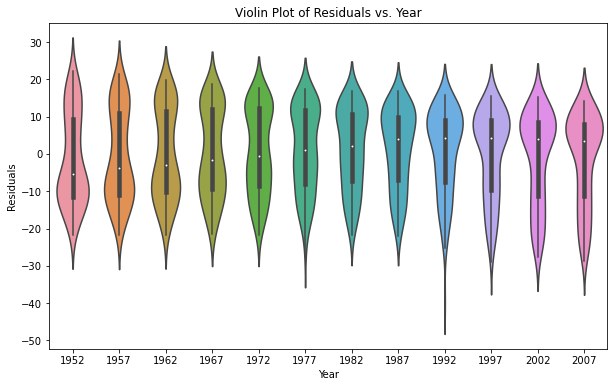

In [82]:
# Find residuals
predictions = model.predict(X)
residuals = y - predictions

# Add the residuals to the original DataFrame
data['residuals'] = residuals

# Formatting
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=data)
plt.title('Violin Plot of Residuals vs. Year')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

### Question 8: 

*Does the plot of Exercise 3 match your expectations (as you answered Question 4)?*

The violin plot of residuals versus year for the linear regression model appears to show that the residuals are fairly centered around zero, which suggests that on average, the model predictions are unbiased in relation to the year. This aligns with the expectation that a well-fitted model should have residuals that are randomly distributed around zero.

However, the plot also shows some variability in the spread of residuals across different years. The width of the violins varies, indicating that the variance of the residuals is not constant over time (a condition known as heteroscedasticity), which was not expected based on the assumptions of linear regression. Ideally, we would expect the widths of the violins to be uniform across all years if the assumptions were fully met.

In addition, while it's difficult to determine without a formal test, there may be a slight pattern to the residuals; some years have longer tails on either the upper or lower ends, which could indicate that the linear model doesn't perfectly capture the relationship between year and life expectancy across the full range of the data.

So, the plot partially matches the expectations from Question 4, as the residuals are centered around zero, but it also shows signs of heteroscedasticity, which is a deviation from the ideal scenario described in linear regression assumptions.

### Exercise 4

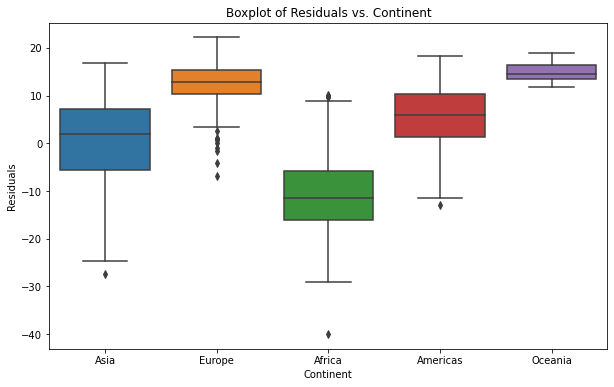

In [83]:
# Box plot formatting
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='residuals', data=data)
plt.title('Boxplot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

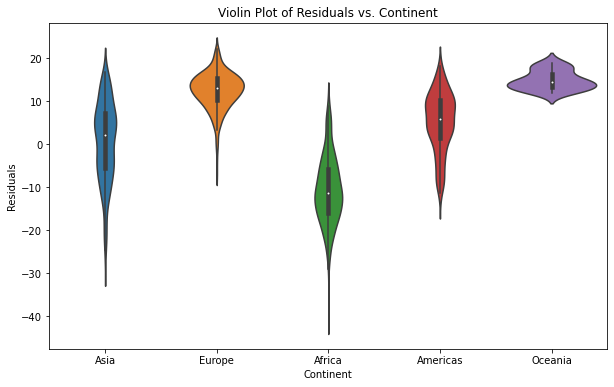

In [84]:
# Violin plot formatting
plt.figure(figsize=(10, 6))
sns.violinplot(x='continent', y='residuals', data=data)
plt.title('Violin Plot of Residuals vs. Continent')
plt.xlabel('Continent')
plt.ylabel('Residuals')
plt.show()

### Question 9: 

*Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?*

In the boxplot of residuals versus continent, the misalignment of medians from zero for continents like Asia and Africa (below zero) and Europe and Oceania (above zero) suggests a model dependency on the continent. This indicates the model's under or overestimation of life expectancy for certain continents, due to not capturing continent-specific factors. In regression analysis, such dependency implies a misspecified model, missing key predictors. To enhance accuracy, the model may need additional variables, interaction terms, or a shift to non-linear or hierarchical models to account for these differences.

### Exercise 5

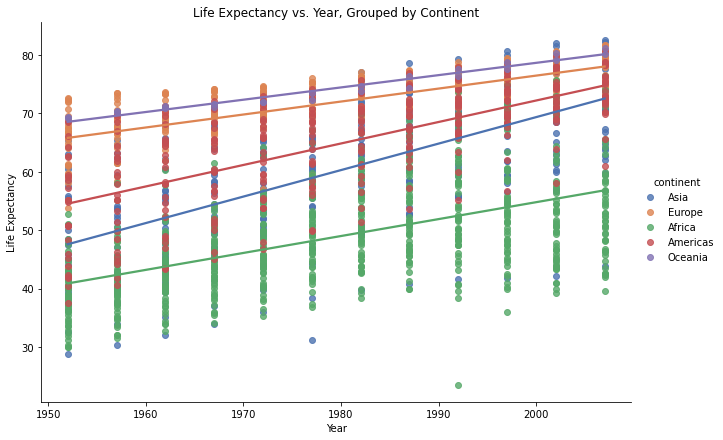

In [85]:
sns.lmplot(x='year', y='lifeExp', hue='continent', data=data,
           height=6, aspect=1.5, ci=None, palette='deep')

plt.title('Life Expectancy vs. Year, Grouped by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

## BONUS QUESTIONS

### BONUS Question 10: 

*Based on this plot, should your regression model include an interaction term for continent and year? Why?*

Incorporating an interaction term for continent and year in the regression model is advisable due to the scatter plot showing distinct life expectancy trajectories for different continents. This inclusion addresses the varying slopes of regression lines, which signify different rates of change in life expectancy per continent. Such an adjustment not only enhances the model's accuracy by accurately capturing the unique relationships between year and life expectancy across continents, but it also offers valuable policy insights. It allows for an understanding of how time's impact on life expectancy varies across regions, reflecting diverse socio-economic and health factors. Ultimately, this leads to a model that more accurately reflects global life expectancy trends and provides deeper insights into their dynamics.

### BONUS Excerise 6

In [86]:
data = pd.get_dummies(data, columns=['continent'], drop_first=False)
# Now, create interaction terms between 'year' and each of the dummy variables for 'continent'
for continent in ['continent_Asia', 'continent_Europe', 'continent_Africa', 'continent_Americas', 'continent_Oceania']:
    data[f"{continent}_year"] = data['year'] * data[continent]

# Prepare the data for modeling
X = data[['year'] + [f"continent_{c}" for c in ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']] +
        [f"continent_{c}_year" for c in ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']]]
y = data['lifeExp']

# Fit the model
model = LinearRegression()
model.fit(X, y)

coef = model.coef_
intercept = model.intercept_
print(f"Intercept: {intercept}")
for feature, c in zip(X.columns, coef):
    print(f"{feature}: {c}")


Intercept: -546.71479834905
year: 0.2570845208318254
continent_Asia: -290.1760969369649
continent_Europe: 179.303804378552
continent_Africa: 22.456952280281573
continent_Americas: -116.39149490042217
continent_Oceania: 204.8068351788868
continent_Asia_year: 0.1960378830673335
continent_Europe_year: -0.03515237630963952
continent_Africa_year: 0.032444742212817346
continent_Americas_year: 0.11056641623117969
continent_Oceania_year: -0.046812143209427504


### BONUS Question 11:

*Are all parameters in the model significantly (in the p-value sense) different from zero? If not, which are not significantly different from zero? Other libraries (statsmodels or patsy may help you solve this problem)*

In [87]:
# Initialize a dictionary to store model summaries for each continent
data = pd.read_csv('gap.tsv', sep='\t')

model_summaries = {}

# Loop through each unique continent in the dataset
for continent in data['continent'].unique():
    # Filter the data for the current continent
    continent_data = data[data['continent'] == continent]
    
    # Prepare the data for the OLS model
    X = continent_data[['year']]
    y = continent_data['lifeExp']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    # Fit the OLS model
    model = sm.OLS(y, X).fit()
    
    # Store the model summary
    model_summaries[continent] = model.summary()

model_summaries

/Users/jimhaines/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/jimhaines/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/jimhaines/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/jimhaines/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/jimhaines/opt/ana

{'Asia': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                lifeExp   R-squared:                       0.436
 Model:                            OLS   Adj. R-squared:                  0.434
 Method:                 Least Squares   F-statistic:                     304.1
 Date:                Mon, 27 Nov 2023   Prob (F-statistic):           6.92e-51
 Time:                        13:43:46   Log-Likelihood:                -1427.7
 No. Observations:                 396   AIC:                             2859.
 Df Residuals:                     394   BIC:                             2867.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

In the regression output provided, both the intercept and the slope coefficients have p-values reported as 0.000, indicating statistical significance at conventional levels. This means that both parameters—the constant term and the yearly change in life expectancy—are significantly different from zero. Consequently, for Bonus Question 11, we conclude that all parameters in the model are significantly different from zero, rejecting the null hypothesis that they could be zero.

### BONUS Question 12: 
*On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)*

In [88]:
data = pd.read_csv('gap.tsv', sep='\t')

# Get the unique continents before dummy variables
unique_continents = data['continent'].unique()

# Get dummy variables for continent
data = pd.get_dummies(data, columns=['continent'], drop_first=False)

# Make interaction terms between year and each of the dummy variables for continent
for continent in unique_continents:
    dummy_continent = f"continent_{continent}"
    data[f"{dummy_continent}_year"] = data['year'] * data[dummy_continent]

# Format data
X_columns = ['year'] + [f"continent_{continent}" for continent in unique_continents] + \
            [f"continent_{continent}_year" for continent in unique_continents]
X = data[X_columns]
y = data['lifeExp']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients for the interaction terms to determine the yearly increase in life expectancy
yearly_lifeExp_increase = {continent: model.coef_[X_columns.index(f"continent_{continent}_year")] for continent in unique_continents}

yearly_lifeExp_increase

{'Asia': 0.1960378830673335,
 'Europe': -0.03515237630963952,
 'Africa': 0.032444742212817346,
 'Americas': 0.11056641623117969,
 'Oceania': -0.046812143209427504}

### BONUS Exercise 7
*Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model.*

In [89]:
data['year_gdp_interaction'] = data['year'] * data['gdpPercap']

# Define model with interaction term
X = data[['year', 'gdpPercap', 'year_gdp_interaction']]
y = data['lifeExp']  # or the dependent variable you are analyzing

# Adding a constant to the model (needed for statsmodels)
X = sm.add_constant(X)

# Fitting the model
interaction_model = sm.OLS(y, X).fit()

/Users/jimhaines/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


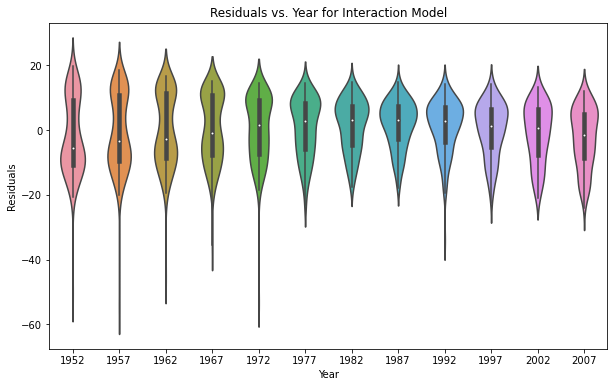

In [90]:
# Create residuals
data['predicted'] = interaction_model.predict(X)
data['residuals'] = data['lifeExp'] - data['predicted']

# Formatting
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='residuals', data=data)
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals vs. Year for Interaction Model')
plt.show()

# Part 2: Classification and Model Selection

## Models

In [91]:
# Load wine data from sklearn
data = load_wine()
X, y = data.data, data.target # Target is class 0, 1, or 2

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Define parameter grid for GridSearchCV
param_grid_dt = {'max_depth': [3, 5, 10]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}

# Grid search for hyperparameter tuning
grid_dt = GridSearchCV(dt, param_grid_dt, cv=10)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10)

grid_dt.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)

# Best models
best_dt = grid_dt.best_estimator_
best_knn = grid_knn.best_estimator_

# Cross-validation and other performance metrics
cv_scores_dt = cross_val_score(best_dt, X, y, cv=10, scoring='accuracy')
cv_scores_knn = cross_val_score(best_knn, X, y, cv=10, scoring='accuracy')
precision_scores_dt = cross_val_score(best_dt, X, y, cv=10, scoring='precision_macro')
precision_scores_knn = cross_val_score(best_knn, X, y, cv=10, scoring='precision_macro')
recall_scores_dt = cross_val_score(best_dt, X, y, cv=10, scoring='recall_macro')
recall_scores_knn = cross_val_score(best_knn, X, y, cv=10, scoring='recall_macro')


# Statistical test (paired t-test)
t_stat, p_value = stats.ttest_rel(cv_scores_dt, cv_scores_knn)

# Output the results
print("Decision Tree Avg Accuracy Score:", round(np.mean(cv_scores_dt), 3))
print("Decision Tree Avg Precision Score:", round(np.mean(precision_scores_dt), 3))
print("Decision Tree Avg Recall Score:", round(np.mean(recall_scores_dt), 3))

print("k-NN Avg Accuracy Score:", round(np.mean(cv_scores_knn), 3))
print("k-NN Avg Precision Score:", round(np.mean(precision_scores_knn), 3))
print("k-NN Avg Recall Score:", round(np.mean(recall_scores_knn), 3), "\n")


print("BONUS QUESTION")
print("Paired t-test p-value:", round(p_value, 6))

Decision Tree Avg Accuracy Score: 0.859
Decision Tree Avg Precision Score: 0.893
Decision Tree Avg Recall Score: 0.873
k-NN Avg Accuracy Score: 0.67
k-NN Avg Precision Score: 0.665
k-NN Avg Recall Score: 0.658 

BONUS QUESTION
Paired t-test p-value: 0.000423


## Model Comparison / Discussion

*Compare the two chosen algorithms on their prediction performance, using your chosen dataset. Let us know what your performance metric is (e.g., accuracy, false negative rate (FNR), false positive rate (FPR), precision, recall, etc), and feel free to use more than one. Use either (i) holdout validation, like we discussed in class , or (ii) 10-fold cross-validation. SKLearn offers some one-liners to help with cross-validation; more info can be found.*


The 2 models we chose to use were a deciscion tree classifier and a KNN classifier model, both using 10-fold cross-validation. We used Grid Search for hyperparameter tuning (using `GridSearchCV`) for both Decision Tree (`grid_dt`) and KNN (`grid_knn`) classifiers. We looked at different values for both `max_depth` and `n_neighbors` to identify which hyperparameter values resulted in the highest accuracy ratings during cross validation.

The performance metrics we observed were accuracy, precision, and recall. The 2 models we used provided significant differences in all performance metrics. The decision tree scored about 0.2 higher on all 3 metrics. In terms of accuracy, the decision tree was better at making correct predictions, and this value is more reliable because the distribution of classes of the wine is fairly even. The decision tree was also more precise, meaning that it has a higher proportion of its positive predictions correct comapred to the KNN model. Finally, the decision had better recall meaning that it was better at finding a higher proportion of actual positives compared to the KNN model.

### BONUS

*If you ran 10-fold cross-validation, feel free to run a statistical test such as a paired t-test to further support your performance comparison above.*

We ran a paired t-test on our models because we used 10-fold cross-validation. We got a very small p-value for the paired t-test, below 0.05, which suggests that there is evidence that we can reject the null hypothesis that there is no significant difference in the performance of the two models. Our previously discussed performance metrics help to illustrate this finding as it is obvious to see that the decision tree classifier model performed much better than the KNN model for this data set. 